In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import svm

In [3]:
data_path = "../data/Iris.csv"
df = pd.read_csv(data_path,index_col="Id")

In [130]:
w = (svm.init_wights(3,len(list(df.columns)[:-2]))) /4.0
w.shape

(3, 5)

In [131]:
w

array([[-0.12050107,  0.02895605,  0.08178606,  0.05321439, -0.01114714],
       [-0.0645704 ,  0.00065058,  0.02473285,  0.00174593,  0.0973163 ],
       [-0.08417583, -0.01216366,  0.06644589, -0.100195  ,  0.07986085]])

In [6]:
st_ont_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [7]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data = np.concatenate([data,np.ones((data.shape[0],1))], axis=1)

In [9]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [10]:
df['label'] = list(map( lambda x:st_ont_dict[x],df['Species'] ))

In [11]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0


In [132]:
w ,costs , train_acc , test_acc = svm.epoch_minpatch(1000, w, 
        data.T, df.label,
        data[0::10].T, df.label[0::10],
        batch_size=25
        ,optimizer="GD"
        ,alpha=0.001,lambd=.7)

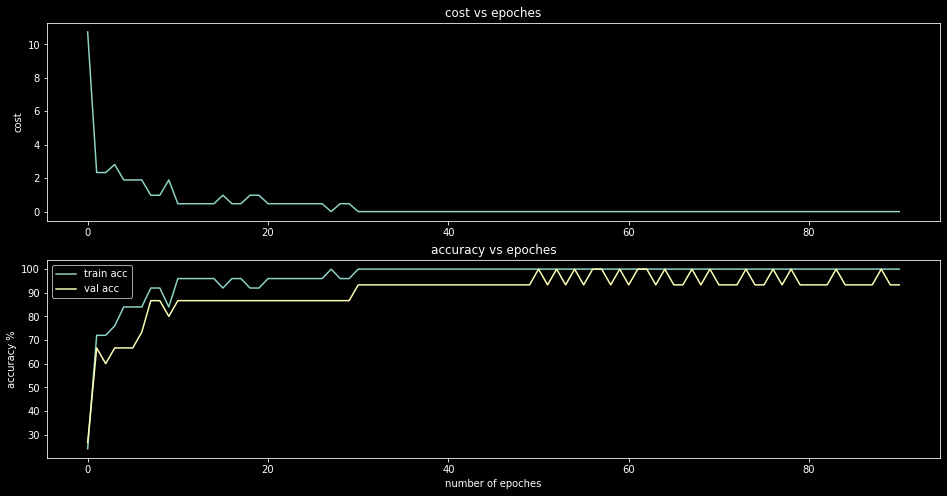

In [137]:
with plt.style.context('dark_background'):
    l = 1000/15
    svm.eval(train_acc[::int(l)],test_acc[::int(l)],costs[::int(l)],text2='val acc')

In [138]:
train_acc[-1], test_acc[-1]

(100.0, 100.0)

In [139]:
out = svm.predict(w, data[::30].T)
labels = df.label[::30]
np.sum(out==labels) / len(labels)

1.0